<a href="https://colab.research.google.com/github/charithcherry/Internship-and-College-Repo-/blob/master/ML%20Ground/Types%20of%20Recommender%20systems/Different_type_of_Recommender_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [4]:
!ls

 bento_service.py      Placement_Data_Full_Class.csv
 bento_sservice.py     product_descriptions.csv
 finalized_model.sav   __pycache__
 moviedata	       ratings_Beauty.csv
 movies.csv	       Retail_before_preprocessing.html
'Online Retail.xlsx'



## **Product popularity based recommendation** 
* Popularity based are a great strategy to target the new customers with the most popular products sold on a business's website and is very useful to cold start a recommendation engine.

* **Dataset : **[Amazon product review dataset](https://www.kaggle.com/skillsmuggler/amazon-ratings)

#### Importing libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

#### Loading the dataset

In [6]:
amazon_ratings = pd.read_csv('ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [7]:
amazon_ratings.shape

(2023070, 4)

In [8]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


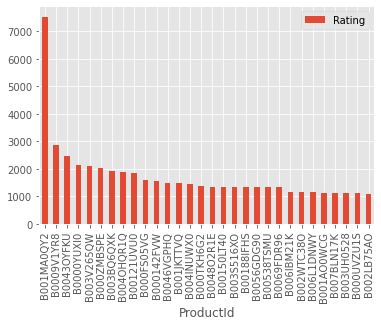

In [9]:
most_popular.head(30).plot(kind = "bar")

## **Utility Matrix based on products sold and user reviews**
**Utility Matrix : **An utlity matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce as none of the users would buy all teh items in the list, hence, most of the values are unknown.

In [10]:
# Subset of Amazon Ratings

amazon_ratings1 = amazon_ratings.head(10000)

In [11]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,130414674X,1304168522,1304174778,1304174867,1304174905,1304196046,1304196062,1304196070,1304196135,1304351475,1304482596,1304482634,1304482685,1304488608,1304495396,1304511073,1304511081,1304511111,130451112X,1304511138,1304511146,1304511154,1304622193,1304622223,1304622428,1304622452,1304622460,1304622622,1304622657,1304622665,...,B000052YMU,B000052YMV,B000052YMX,B000052YN5,B000052YN6,B000052YN7,B000052YN9,B000052YNA,B000052YNB,B000052YNE,B000052YOC,B000052YOG,B000052YOL,B000052YOM,B000052YOQ,B000052YOR,B000052YOS,B000052YOT,B000052YOU,B000052YOV,B000052YOX,B000052YOY,B000052YOZ,B000052YP0,B000052YP1,B000052YP3,B000052YP4,B000052YP6,B000052YP9,B000052YPC,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


As expected, the utility matrix obtained above is sparse, so we  fill the unknown values wth 0.

In [12]:
ratings_utility_matrix.shape

(9697, 886)

Transposing the matrix

In [13]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,A0870685EP51H0X8LFFU,A100AM334XZS3V,A100GYE1W4OXZ8,A100UD67AHFODS,A101GN97A47S1P,A10205RFE66H1R,A1029IITTU8289,A102LFZGD4MJXV,A1034GEUA8ZVFR,A103BJIOJSDJL1,A103FNP25GNMPH,A103PIRYKWQKR7,A103QH6R6A4FT1,A103QUZ016BQNJ,A103U3KR4L2ZXT,A1041053SID37WN8GTT8,A104CBA4A4HYOF,A104D62WJII6KP,A105C73RQ4YGCW,A1087Y8RJ4D422,A108HJD2ESJXUY,A108JE8E0CK1G3,A108LMMYNGL89M,A108V4O9Z78DB5,A10BXWWQPUDNCW,A10BZV61MNLBZD,A10C03UY4QEHJT,A10FEMX3ROQPTD,A10FXC2G4J7V6J,A10G0QS2B1S9J2,...,AZD8DMTDUVUDL,AZDHBUN122II4,AZDIZ674B4GVL,AZEIM64I6C7WW,AZG4Z8O02E9H4,AZG82XLVC98Y3,AZGGH4GS18RUN,AZGNXVV2ENZW8,AZHA72ZW5U8,AZJ8PVOKAJS5,AZJSE6RVOUU0E,AZKWPIG6RXKNG,AZLE2XFH3JUNG,AZLXFHIJ0J4VQ,AZLYAJ8XE443K,AZM0CLX6A5FFB,AZM3MWNYYPF0J,AZMS0XGWN43LW,AZMW54GPQ0WTQ,AZMWU0SO3H0DG,AZN3PS2PIZV06,AZNACMHVBRB5P,AZNOO10AO8G8V,AZP9CW7C6G8XO,AZPJ8ZDUN5HY8,AZSCK9QG6SMSB,AZSY5LHJ6LN7F,AZUFBU43ILNPC,AZUOLPXIGPG5O,AZW0RIARTTWWR,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
X.shape

(886, 9697)

Unique products in subset of data

In [15]:
X1 = X

### Decomposing the Matrix

In [16]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

### Correlation Matrix

In [17]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

correlation_matrix

### Isolating Product ID # 6117036094 from the Correlation Matrix

Assuming the customer buys Product ID # 6117036094 (randomly chosen)

In [18]:
X.index[99]

'6117036094'

Index # of product ID purchased by customer

In [19]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [20]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

### Recommending top 10 highly correlated products in sequence

In [21]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['0762451459',
 '1304139220',
 '130414674X',
 '1304174778',
 '1304196046',
 '1304196062',
 '1304196135',
 '1304482634',
 '1304482685']

**Product Id # **
Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website. 

## **Item Item based recommendation system**
* For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.
* **Dataset : **[Home Depot's dataset with product dataset.](https://www.kaggle.com/c/home-depot-product-search-relevance/data)

In [22]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [23]:
product_descriptions = pd.read_csv('product_descriptions.csv')
product_descriptions.shape

(124428, 2)

#### Checking for missing values

In [24]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [25]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

#### Feature extraction from product descriptions

Converting the text in product description into numerical data for analysis

In [26]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

#### Visualizing product clusters in subset of data

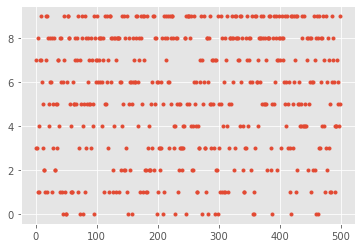

In [27]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()


F

In [28]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print('\n')

#### Top words in each cluster based on product description

In [29]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 light
 watt
 led
 flush
 bulb
 bulbs
 lighting
 toilet
 fixture
 power


Cluster 1:
 air
 water
 window
 cooling
 filter
 fan
 heater
 installation
 easy
 control


Cluster 2:
 frame
 patio
 steel
 fabric
 collection
 dining
 rust
 cushions
 outdoor
 wicker


Cluster 3:
 ft
 natural
 easy
 10
 landscape
 ladder
 patio
 size
 sq
 100


Cluster 4:
 storage
 door
 shelves
 nickel
 easy
 cabinet
 design
 room
 adjustable
 finish


Cluster 5:
 wall
 piece
 finish
 snow
 use
 trim
 tile
 design
 insulation
 plate


Cluster 6:
 cutting
 handle
 blade
 saw
 easy
 metal
 tool
 steel
 watering
 head


Cluster 7:
 painted
 post
 moulding
 used
 home
 proposition
 nbsp
 residents
 california
 65


Cluster 8:
 concrete
 water
 brush
 garage
 epoxy
 vary
 product
 seal
 paint
 coating


Cluster 9:
 volt
 power
 battery
 lithium
 m12
 ion
 20
 tool
 max
 charge




#### Predicting clusters based on key search words

In [30]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

* **Keyword : ** cutting tool

In [31]:
show_recommendations("cutting tool")

Cluster 6:
 cutting
 handle
 blade
 saw
 easy
 metal
 tool
 steel
 watering
 head




* **Keyword : **books

In [32]:
show_recommendations("books")

Cluster 3:
 ft
 natural
 easy
 10
 landscape
 ladder
 patio
 size
 sq
 100




* **Keyword : **steel drill

In [33]:
show_recommendations("steel drill")

Cluster 6:
 cutting
 handle
 blade
 saw
 easy
 metal
 tool
 steel
 watering
 head




In case a word appears in multiple clusters, the algorithm chooses the cluster with the highest frequency of occurance of the word.

* **Keyword : **water

In [34]:
show_recommendations("tool")

Cluster 6:
 cutting
 handle
 blade
 saw
 easy
 metal
 tool
 steel
 watering
 head




## Content Based Recommender System

In [35]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
def get_title_from_index(index):
    return df[df.index==index]["title"].values[0]

def get_index_from_title(title):
    return df[df.title==title]["index"].values[0]

In [37]:
df=pd.read_csv("movies.csv")
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [38]:
df.shape

(4803, 24)

In [39]:
features=['keywords','cast','genres','director']

for feature in features:
    df[feature]=df[feature].fillna('')


In [40]:
def combine_features(row):
    try:
        return row['keywords']+" "+row['cast']+" "+row['genres']+" "+row['director']
    except:
        print("error",row)


In [41]:
df['combined features']=df.apply(combine_features,axis=1)

In [42]:
cv=CountVectorizer()
cm=cv.fit_transform(df['combined features'])
cs=cosine_similarity(cm)


In [43]:
movie=input("Enter movie: ")
movie_index=get_index_from_title(movie)
sm=list(enumerate(cs[movie_index]))
sorted_sm=sorted(sm,key=lambda x:x[1],reverse=True)

Enter movie: Avatar


In [44]:
i=0
for m in sorted_sm:
    print(get_title_from_index(m[0]))
    i=i+1
    if i==20:
        break

Avatar
Guardians of the Galaxy
Aliens
Star Wars: Clone Wars: Volume 1
Star Trek Into Darkness
Star Trek Beyond
Alien
Lockout
Jason X
The Helix... Loaded
Moonraker
Planet of the Apes
Galaxy Quest
Gravity
Alien³
Jupiter Ascending
The Wolverine
Silent Running
Zathura: A Space Adventure
Trekkies


## **Knowledge Based Recommender System**
https://ilmoirfan.com/developing-knowledge-based-recommender-system/

In [138]:
data =pd.read_csv('movies.csv')
data.head(5)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [139]:
data=data[['original_title','genres','release_date','runtime','vote_average','vote_count']]

In [140]:
data.head()



,original_title,genres,release_date,runtime,vote_average,vote_count
0,Avatar,Action Adventure Fantasy Science Fiction,2009-12-10,162.0,7.2,11800
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,2007-05-19,169.0,6.9,4500
2,Spectre,Action Adventure Crime,2015-10-26,148.0,6.3,4466
3,The Dark Knight Rises,Action Crime Drama Thriller,2012-07-16,165.0,7.6,9106
4,John Carter,Action Adventure Science Fiction,2012-03-07,132.0,6.1,2124


In [141]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')


In [142]:
data['year']=data['release_date'].apply(lambda x: str(x).split('-')[0] if x!=np.nan else np.nan)

In [143]:
def convert_int(x):
  try:
    return int(x)
  except:
    return 0  

In [144]:
data['year']=data['year'].apply(convert_int)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original_title  4803 non-null   object        
 1   genres          4775 non-null   object        
 2   release_date    4802 non-null   datetime64[ns]
 3   runtime         4801 non-null   float64       
 4   vote_average    4803 non-null   float64       
 5   vote_count      4803 non-null   int64         
 6   year            4803 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 262.8+ KB


In [146]:
data=data.drop('release_date',axis=1)

In [147]:
data.head()

,original_title,genres,runtime,vote_average,vote_count,year
0,Avatar,Action Adventure Fantasy Science Fiction,162.0,7.2,11800,2009
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,169.0,6.9,4500,2007
2,Spectre,Action Adventure Crime,148.0,6.3,4466,2015
3,The Dark Knight Rises,Action Crime Drama Thriller,165.0,7.6,9106,2012
4,John Carter,Action Adventure Science Fiction,132.0,6.1,2124,2012


In [148]:
data.iloc[0]['genres']

'Action Adventure Fantasy Science Fiction'

In [149]:
from ast import literal_eval



In [150]:
data['genres']=data['genres'].fillna('[]')

In [151]:
def Convert(string):
    li = list(string.split(" "))
    return li

In [152]:
data['genres'] = data['genres'].apply(Convert)

In [154]:
data.head()

,original_title,genres,runtime,vote_average,vote_count,year
0,Avatar,"[Action, Adventure, Fantasy, Science, Fiction]",162.0,7.2,11800,2009
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",169.0,6.9,4500,2007
2,Spectre,"[Action, Adventure, Crime]",148.0,6.3,4466,2015
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",165.0,7.6,9106,2012
4,John Carter,"[Action, Adventure, Science, Fiction]",132.0,6.1,2124,2012


In [155]:
s=data.apply(lambda x:pd.Series(x['genres']),axis=1).stack().reset_index(level=1,drop=True)

In [156]:
s.name='genre'


In [157]:
gen_df=data.drop('genres',axis=1).join(s)

In [162]:
gen_df["genre"] = gen_df["genre"].str.lower()


In [163]:
gen_df.head(10)

,original_title,runtime,vote_average,vote_count,year,genre
0,Avatar,162.0,7.2,11800,2009,action
0,Avatar,162.0,7.2,11800,2009,adventure
0,Avatar,162.0,7.2,11800,2009,fantasy
0,Avatar,162.0,7.2,11800,2009,science
0,Avatar,162.0,7.2,11800,2009,fiction
1,Pirates of the Caribbean: At World's End,169.0,6.9,4500,2007,adventure
1,Pirates of the Caribbean: At World's End,169.0,6.9,4500,2007,fantasy
1,Pirates of the Caribbean: At World's End,169.0,6.9,4500,2007,action
2,Spectre,148.0,6.3,4466,2015,action
2,Spectre,148.0,6.3,4466,2015,adventure


In [167]:
def chart_building(genre,low_time,high_time,low_year,high_year,gen_df,percentile=0.8):
  movies=gen_df.copy()
  movies=movies[(movies['genre']==genre) &
                (movies['runtime']>=low_time) &
                (movies['runtime']<=high_time) &
                (movies['year']>=low_year) &
                (movies['year']<=high_year)]

  C=movies['vote_average'].mean()
  m=movies['vote_count'].quantile(percentile)
  q_movies=movies.copy().loc[movies['vote_count']>=m]  
  q_movies['score']=q_movies.apply(lambda x:(x['vote_count']/(x['vote_count']+m)*x['vote_average'])+(m/(m+x['vote_count'])*C),axis=1)
  q_movies=q_movies.sort_values('score',ascending=False)
  return q_movies  


### Input-Output

In [169]:
print("input preferred genre")
genre=input()
print("input shortest duration")
low_time=int(input())
print("input lonest duration")
high_time=int(input())
print("input earliest year")
low_year=int(input())
print("input latest year")
high_year=int(input())
KBS=chart_building(genre,low_time,high_time,low_year,high_year,gen_df).head()
KBS=KBS.original_title
KBS=KBS.reset_index(drop=True)
KBS

input preferred genre
drama
input shortest duration
20
input lonest duration
160
input earliest year
1990
input latest year
2013


0    The Shawshank Redemption
1                  Fight Club
2             The Dark Knight
3                Forrest Gump
4                  GoodFellas
Name: original_title, dtype: object